<a href="https://colab.research.google.com/github/chethanchandran/DataScience/blob/master/Covid_19_India_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
!pip install -U kaleido
from kaleido.scopes.plotly import PlotlyScope

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Requirement already up-to-date: kaleido in /usr/local/lib/python3.6/dist-packages (0.0.3.post1)


In [3]:
states=pd.read_csv("https://api.covid19india.org/csv/latest/states.csv")
state_wise=pd.read_csv("https://api.covid19india.org/csv/latest/state_wise.csv")
districts=pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")

In [4]:
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6737 non-null   object 
 1   State      6737 non-null   object 
 2   Confirmed  6737 non-null   int64  
 3   Recovered  6737 non-null   int64  
 4   Deceased   6737 non-null   int64  
 5   Other      6737 non-null   int64  
 6   Tested     5987 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 368.6+ KB


In [5]:
states['State'].unique()

array(['Kerala', 'India', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
       'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh',
       'Himachal Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry',
       'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Goa', 'Mizoram',
       'Andaman and Nicobar Islands', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Nagaland', 'Tripura',
       'Dadra and Nagar Haveli and Daman and Diu', 'Meghalaya', 'Sikkim',
       'State Unassigned'], dtype=object)

In [6]:
RemoveIndexes=states[states['State'].isin(['India','State Unassigned'])].index
RemoveIndexes

Int64Index([   1,    3,    5,    7,   11,   16,   22,   29,   36,   45,
            ...
            6409, 6445, 6481, 6517, 6553, 6589, 6625, 6661, 6697, 6733],
           dtype='int64', length=268)

In [7]:
states.drop(RemoveIndexes,inplace=True)

In [8]:
states['Date']=pd.to_datetime(states['Date'],dayfirst=True)
states['Month']=states['Date'].apply(lambda x:x.strftime("%B"))
states['Date_Formatted']=(states['Date'].apply(lambda x:x.strftime('%d/%m/%y')))
states.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested,Month,Date_Formatted
0,2020-01-30,Kerala,1,0,0,0,NaN,January,30/01/20
2,2020-02-02,Kerala,2,0,0,0,NaN,February,02/02/20
4,2020-02-03,Kerala,3,0,0,0,NaN,February,03/02/20
6,2020-02-14,Kerala,3,3,0,0,NaN,February,14/02/20
8,2020-03-02,Delhi,1,0,0,0,NaN,March,02/03/20


In [9]:
FirstCaseDiscoveredSeries=states['Date'].groupby(states['State']).min()
FirstCaseDiscovered=pd.DataFrame({'State':FirstCaseDiscoveredSeries.index,
                                  'Date':FirstCaseDiscoveredSeries.values})
StateAndFirstDiscovery=pd.merge(states,FirstCaseDiscovered,on=['State','Date'])
StateAndFirstDiscovery

,Date,State,Confirmed,Recovered,Deceased,Other,Tested,Month,Date_Formatted
0,2020-01-30,Kerala,1,0,0,0,NaN,January,30/01/20
1,2020-03-02,Delhi,1,0,0,0,NaN,March,02/03/20
2,2020-03-02,Telangana,1,0,0,0,NaN,March,02/03/20
3,2020-03-03,Rajasthan,1,0,0,0,NaN,March,03/03/20
4,2020-03-04,Haryana,14,0,0,0,NaN,March,04/03/20
5,2020-03-04,Uttar Pradesh,7,0,0,0,NaN,March,04/03/20
6,2020-03-07,Ladakh,2,0,0,0,NaN,March,07/03/20
7,2020-03-07,Tamil Nadu,1,0,0,0,NaN,March,07/03/20
8,2020-03-09,Jammu and Kashmir,1,0,0,0,NaN,March,09/03/20
9,2020-03-09,Karnataka,1,0,0,0,NaN,March,09/03/20


In [10]:
symbol=[2*i for i in StateAndFirstDiscovery['Confirmed']]
fig=px.scatter(StateAndFirstDiscovery,x="State",y="Date_Formatted",
             hover_data=["Confirmed"],#text="Confirmed",
             #height=400,
             size='Confirmed',
             title='First Confirmed Case in the State',color='Confirmed',labels={'Date_Formatted':'Date of First Case'})
fig.update_traces(textposition='middle left')

fig.show()

In [11]:
symbol=[2*i for i in StateAndFirstDiscovery['Confirmed']]
fig=px.scatter(StateAndFirstDiscovery.head(10),x="State",y="Date_Formatted",
             hover_data=["Confirmed"],#text="Confirmed",
             #height=400,
             size='Confirmed',
             title='First Confirmed Case in the State',color='Confirmed',labels={'Date_Formatted':'Date of First Case'})
fig.update_traces(textposition='middle left')

fig.show()

In [12]:
MonthlyCases=states.sort_values(['State','Date']).groupby(['State','Month'],as_index=False)[['Recovered','Deceased','Confirmed']].sum()
MonthlyCases['Month_Index']=MonthlyCases['Month'].apply(lambda x:datetime.datetime.strptime(x, "%B"))
MonthlyCases=MonthlyCases.sort_values(['State','Month_Index'])
MonthlyCasesUniqueStates=MonthlyCases['State'].unique()

In [13]:
specsSecondary=[[{"secondary_y": True},{"secondary_y": True}] for i in range(21)]
fig = make_subplots(
    rows=21, cols=2,specs=specsSecondary,
    subplot_titles=MonthlyCasesUniqueStates
    #,subplot_titles=("Plot 1", "Plot 2", "Plot 3", "Plot 4")
)
rowCounter=1
colCounter=1
for state in MonthlyCasesUniqueStates:
    tempCases=MonthlyCases[MonthlyCases['State']==state]
    fig.add_trace(go.Bar(x=tempCases['Month'], y=tempCases['Confirmed'],name=state+' - Confirmed',showlegend=True,width=0.3,hovertext=['State','Confirmed']),
                  row=rowCounter,col=colCounter,secondary_y=False,
                )
    fig.add_trace(go.Bar(x=tempCases['Month'], y=tempCases['Recovered'],name=state+' - Recovered',width=0.3,hovertext=['State','Recovered']),
                  row=rowCounter,col=colCounter,secondary_y=False,
                 )
    fig.add_trace(go.Bar(x=tempCases['Month'], y=tempCases['Deceased'],name=state+' - Deceased',width=0.3,hovertext=['State','Deceased'],
                         text=['State','Deceased'],textposition='inside'),row=rowCounter,col=colCounter,secondary_y=True,
                 )#hover_data=['State/UnionTerritory','Deaths']
    colCounter+=1
    if(colCounter==3):
        colCounter=1
        rowCounter+=1
fig.update_layout(height=10000,width=1500,
                  title_text="States and Monthly Statistics")
fig.show()
scope = PlotlyScope()
with open("figure.png", "wb") as f:
    f.write(scope.transform(fig, format="png"))

In [14]:
#!pip install -U kaleido
from kaleido.scopes.plotly import PlotlyScope
scope = PlotlyScope()
with open("figure.png", "wb") as f:
    f.write(scope.transform(fig, format="png"))

In [15]:
state_wise.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,5367361,4265768,86205,1014631,19/09/2020 22:25:02,757,TT,61705,60428,580,NaN
1,Maharashtra,1167496,834432,31791,300887,18/09/2020 23:05:16,386,MH,0,0,0,[Sep 9] : After reconciling COVID-19 cases in ...
2,Tamil Nadu,536477,481273,8751,46453,19/09/2020 20:38:06,0,TN,5569,5556,66,[July 22]: 444 backdated deceased entries adde...
3,Andhra Pradesh,617776,530711,5302,81763,19/09/2020 18:38:05,0,AP,8218,10820,58,Total includes patients from other states and ...
4,Karnataka,511346,404841,7922,98564,19/09/2020 21:04:02,19,KA,8364,10815,114,NaN


In [16]:
TempDate=pd.DataFrame({'Type':['Confirmed','Active','Deaths','Recovered'],
                       'Cases':[state_wise.loc[:0,:]['Confirmed'][0],
                                state_wise.loc[:0,:]['Active'][0],
                                state_wise.loc[:0,:]['Deaths'][0],
                                state_wise.loc[:0,:]['Recovered'][0]]
                      
                      })
#Selected_Data.loc[:0,:]['Confirmed'][0]
TempDate
fig=px.pie(TempDate,names='Type',values='Cases',title='Total Cases in India',
       color='Type',color_discrete_map={'Active':'purple',
                                 'Deaths':'red',
                                 'Confirmed':'blue',
                                 'Recovered':'green'},hole=0.4)
fig.update_traces(textinfo='value')
fig.show()

In [17]:
#Row index 0 is the aggregation of the Sum of all rows.
#Sorting the data based on the Active cases - Descending Order to get the max at the top
state_wise.sort_values('Active',ascending=False,inplace=True)
#Adding the recovery rate and death rate column
state_wise['Recovery Rate % (per 100)']=((state_wise['Recovered']/state_wise['Confirmed'])*100).apply(lambda x:round(x,2))
state_wise['Mortality Rate % (per 100)']=((state_wise['Deaths']/state_wise['Confirmed'])*100).apply(lambda x:round(x,2))
#state_wise['Active_Rate']=(state_wise['Active']/state_wise['Confirmed'])*100

In [18]:
#Select Required Columns
Selected_Data=state_wise[['State','Confirmed', 'Active', 'Deaths', 'Mortality Rate % (per 100)', 
                        'Recovered', 'Recovery Rate % (per 100)']]
Selected_Data.reset_index(drop=True,inplace=True)
Selected_Data.head()

,State,Confirmed,Active,Deaths,Mortality Rate % (per 100),Recovered,Recovery Rate % (per 100)
0,Total,5367361,1014631,86205,1.61,4265768,79.48
1,Maharashtra,1167496,300887,31791,2.72,834432,71.47
2,Karnataka,511346,98564,7922,1.55,404841,79.17
3,Andhra Pradesh,617776,81763,5302,0.86,530711,85.91
4,Uttar Pradesh,348517,66874,4953,1.42,276690,79.39


In [27]:
Selected_Data.loc[1:,].style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Mortality Rate % (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Recovery Rate % (per 100)"])



,State,Confirmed,Active,Deaths,Mortality Rate % (per 100),Recovered,Recovery Rate % (per 100)
1,Maharashtra,1167496,300887,31791,2.720000,834432,71.470000
2,Karnataka,511346,98564,7922,1.550000,404841,79.170000
3,Andhra Pradesh,617776,81763,5302,0.860000,530711,85.910000
4,Uttar Pradesh,348517,66874,4953,1.420000,276690,79.390000
5,Tamil Nadu,536477,46453,8751,1.630000,481273,89.710000
6,Kerala,131027,37489,520,0.400000,92947,70.940000
7,Chhattisgarh,81617,36580,645,0.790000,44392,54.390000
8,Odisha,175550,33149,744,0.420000,141657,80.690000
9,Delhi,242899,32064,4945,2.040000,205890,84.760000
10,Assam,155453,31218,548,0.350000,123684,79.560000


In [20]:
!pip install --upgrade plotly
AllStates=Selected_Data.loc[1:,:].copy()
#Tree map cannot be drawn with NaN values, dropping Nan values
AllStates.dropna(inplace=True)
fig = px.treemap(AllStates,path=['State'],values='Active',color='Active',hover_data=['Confirmed','Deaths','Active','Recovered'],
                #color_continuous_scale='Reds'
                )
fig.show()

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.10.0)


In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Confirmed', x=AllStates['State'], y=AllStates['Recovered']),
    go.Bar(name='Active', x=AllStates['State'], y=AllStates['Active']),
    go.Bar(name='Death', x=AllStates['State'], y=AllStates['Deaths'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



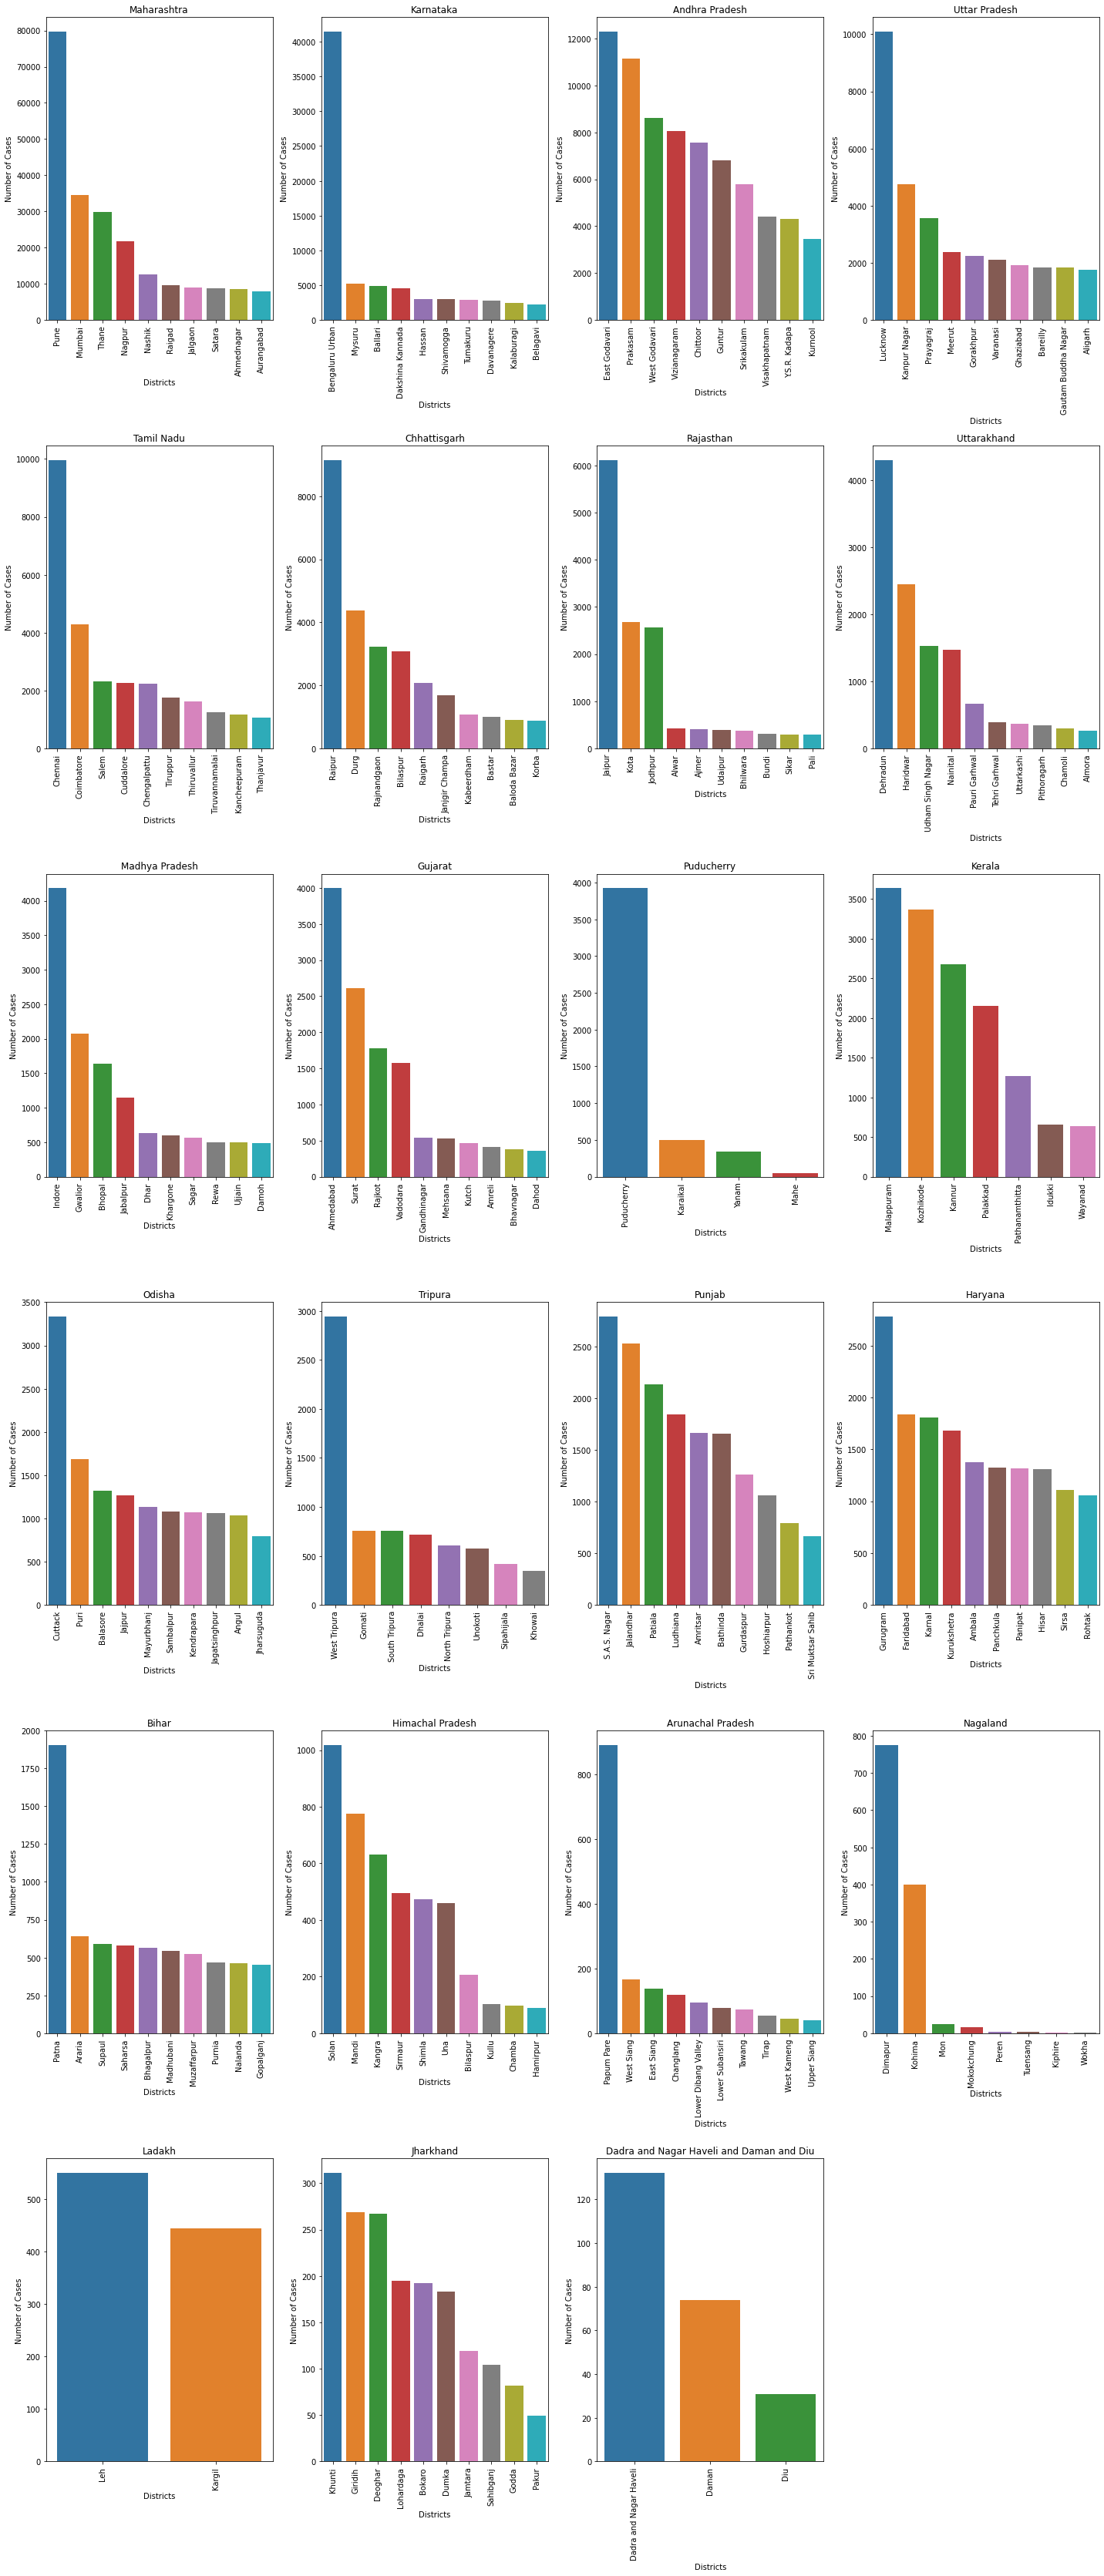

In [28]:
todayDate=datetime.date.today().strftime('%Y-%m-%d')
StateDictrictGroupedData=districts[districts['Date']==todayDate].copy()
#DictrictGroupedData=StateDistrictdData.groupby('District',as_index=False).sum()
StateDictrictGroupedData['Recovery Rate (per 100)']=(StateDictrictGroupedData['Recovered']/StateDictrictGroupedData['Confirmed'])*100
StateDictrictGroupedData['Mortality Rate (per 100)']=(StateDictrictGroupedData['Deceased']/StateDictrictGroupedData['Confirmed'])*100
StateDictrictGroupedData['Active']=StateDictrictGroupedData['Confirmed']-(StateDictrictGroupedData['Recovered']+StateDictrictGroupedData['Deceased'])
StateDictrictGroupedData.sort_values('Active',ascending=False,inplace=True)
StateDictrictGroupedData.reset_index(drop=True,inplace=True)
StateDictrictGroupedData[['State','District','Confirmed','Recovered','Deceased','Active','Mortality Rate (per 100)','Recovery Rate (per 100)']]


StateDictrictGroupedData.dropna(inplace=True)
StateDictrictGroupedData.drop(StateDictrictGroupedData.loc[StateDictrictGroupedData['Active']==0].index,inplace=True)
StateDictrictGroupedData.drop(StateDictrictGroupedData.loc[StateDictrictGroupedData['District']=='Unknown'].index,inplace=True)


plt.figure(figsize=(20,60))
i=0
for state in StateDictrictGroupedData['State'].unique():
    plt.subplot(8,4,i+1)
    df4=StateDictrictGroupedData[StateDictrictGroupedData['State']==state].sort_values('Active',ascending=False)
    df4=df4.head(10)
    if(df4.shape[0]==1):
      continue
    sns.barplot(data=df4,x='District',y='Active')
    plt.xlabel('Districts')
    plt.ylabel('Number of Cases')
    plt.title(state)
    plt.xticks(rotation=90)
    i+=1
plt.tight_layout()
plt.show()

In [23]:
StateDictrictGroupedData[StateDictrictGroupedData['District']!='Unknown']

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested,Recovery Rate (per 100),Mortality Rate (per 100),Active
0,2020-09-19,Maharashtra,Pune,253554,168730,5133,0,1012245.0,66.545982,2.024421,79691
1,2020-09-19,Karnataka,Bengaluru Urban,191438,147378,2625,1,1320015.0,76.984716,1.371201,41435
2,2020-09-19,Maharashtra,Mumbai,180668,137664,8375,370,977722.0,76.197224,4.635575,34629
3,2020-09-19,Delhi,Delhi,242899,205890,4945,0,2492602.0,84.763626,2.035826,32064
6,2020-09-19,Maharashtra,Thane,166982,132611,4449,1,712390.0,79.416344,2.664359,29922
...,...,...,...,...,...,...,...,...,...,...,...
632,2020-09-19,Arunachal Pradesh,Siang,44,42,0,0,2766.0,95.454545,0.000000,2
633,2020-09-19,Nagaland,Kiphire,16,14,0,0,18.0,87.500000,0.000000,2
635,2020-09-19,Nagaland,Wokha,35,34,0,0,7.0,97.142857,0.000000,1
639,2020-09-19,Arunachal Pradesh,Kra Daadi,4,3,0,0,2982.0,75.000000,0.000000,1


In [24]:
SateOfInterest='Karnataka'
print(f"'{SateOfInterest}' stands at Position '{Selected_Data[Selected_Data['State']==SateOfInterest].index[0]}', with \
'{Selected_Data[Selected_Data['State']==SateOfInterest]['Active'].values[0]}' Active cases")

'Karnataka' stands at Position '2', with '98564' Active cases


In [29]:
todayDate=datetime.date.today().strftime('%Y-%m-%d')
DictrictGroupedData=districts[(districts['State']==SateOfInterest) & (districts['Date']==todayDate)].copy()
#DictrictGroupedData=StateDistrictdData.groupby('District',as_index=False).sum()
DictrictGroupedData['Recovery Rate % (per 100)']=(DictrictGroupedData['Recovered']/DictrictGroupedData['Confirmed'])*100
DictrictGroupedData['Mortality Rate % (per 100)']=(DictrictGroupedData['Deceased']/DictrictGroupedData['Confirmed'])*100
DictrictGroupedData['Active']=DictrictGroupedData['Confirmed']-(DictrictGroupedData['Recovered']+DictrictGroupedData['Deceased'])
DictrictGroupedData.sort_values('Active',ascending=False,inplace=True)
DictrictGroupedData.reset_index(drop=True,inplace=True)
DictrictGroupedData[['District','Confirmed','Recovered','Deceased','Active','Mortality Rate % (per 100)','Recovery Rate % (per 100)']]\
.style.background_gradient(cmap='Oranges',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deceased"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='Greys',subset=["Mortality Rate % (per 100)"])\
                        .background_gradient(cmap='Oranges',subset=["Recovery Rate % (per 100)"])

,District,Confirmed,Recovered,Deceased,Active,Mortality Rate % (per 100),Recovery Rate % (per 100)
0,Bengaluru Urban,191438,147378,2625,41435,1.371201,76.984716
1,Mysuru,29303,23432,679,5192,2.317169,79.964509
2,Ballari,28785,23532,392,4861,1.361820,81.750912
3,Dakshina Kannada,19754,14750,474,4530,2.399514,74.668422
4,Shivamogga,13678,10406,225,3047,1.644977,76.078374
5,Hassan,13248,9958,243,3047,1.834239,75.166063
6,Tumakuru,10750,7587,208,2955,1.934884,70.576744
7,Davanagere,14406,11331,231,2844,1.603499,78.654727
8,Kalaburagi,15443,12672,257,2514,1.664184,82.056595
9,Belagavi,17659,15101,263,2295,1.489326,85.514469


In [26]:
#Tree map cannot be drawn with NaN values, dropping Nan values
DictrictGroupedData.dropna(inplace=True)
DictrictGroupedData.drop(DictrictGroupedData.loc[DictrictGroupedData['Active']==0].index,inplace=True)
fig = px.treemap(DictrictGroupedData,path=['District'],values='Active',color='Active',hover_data=['Confirmed','Deceased','Active','Recovered'],
                #color_continuous_scale='Reds'
                )
fig.show()
